In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\bruno\Downloads\exit-roulette-excel.csv", skiprows = 6, sep = ';')

df = df.drop([ 'percentage-stationary-staff', 'alarm?',  
               'verbose?', 'debug?', 'average-response-time',
               'agents-at-start', 'percentage-female',
               'percentage-children',
               '[step]', 'alerting-range'],1)

changes = {'precision ((count visitors with [evacuating? = false] / count visitors) * 100) 2': 'percentage_evacuating',
           '[run number]': 'run_number'}

# Renaming relevant column
df = df.rename(columns = changes)
df


,run_number,max-turtles-per-patch,Preferred-exit-door,percentage-visitors-go-to-preferred-exit,evacuation-duration,event-duration,people-in-building,staff-members-in-building,visitors-in-building,percentage_evacuating
0,8,1,main,96,0,0,450,50,400,100
1,8,1,main,96,0,1,450,50,400,100
2,8,1,main,96,0,2,450,50,400,100
3,8,1,main,96,0,3,450,50,400,100
4,8,1,main,96,0,4,450,50,400,100
...,...,...,...,...,...,...,...,...,...,...
272917,600,4,upper-right,96,396,426,1,0,1,0
272918,600,4,upper-right,96,397,427,1,0,1,0
272919,600,4,upper-right,96,398,428,1,0,1,0
272920,600,4,upper-right,96,399,429,1,0,1,0


In [3]:
runs = df.groupby(['run_number']).max()
runs.head()

,max-turtles-per-patch,Preferred-exit-door,percentage-visitors-go-to-preferred-exit,evacuation-duration,event-duration,people-in-building,staff-members-in-building,visitors-in-building,percentage_evacuating
run_number,,,,,,,,,
1,1,main,96,385,415,450,50,400,"96,99"
2,1,main,96,386,416,450,50,400,"97,99"
3,1,main,96,363,393,450,50,400,"97,98"
4,1,main,96,395,425,450,50,400,"99,25"
5,1,main,96,337,367,450,50,400,<RuntimePrimitiveException>


In [5]:
evac_times = runs.groupby(['Preferred-exit-door', 'max-turtles-per-patch']).mean()
evac_times

percentage-visitors-go-to-preferred-exit  \
Preferred-exit-door max-turtles-per-patch                                             
lower-left          1                                                          96.0   
                    2                                                          96.0   
                    3                                                          96.0   
                    4                                                          96.0   
main                1                                                          96.0   
                    2                                                          96.0   
                    3                                                          96.0   
                    4                                                          96.0   
upper-right         1                                                          96.0   
                    2                                                          96.0   
                    3                                                          96.0   
                    4                                                          96.0   

                                           evacuation-duration  \
Preferred-exit-door max-turtles-per-patch                        
lower-left          1                                   407.94   
                    2                                   416.76   
                    3                                   413.62   
                    4                                   410.34   
main                1                                   367.40   
                    2                                   365.46   
                    3                                   370.94   
                    4                                   364.98   
upper-right         1                                   488.00   
                    2                                   501.24   
                    3                                   493.78   
                    4                                   485.98   

                                           event-duration  people-in-building  \
Preferred-exit-door max-turtles-per-patch                                       
lower-left          1                              437.94               450.0   
                    2                              446.76               450.0   
                    3                              443.62               450.0   
                    4                              440.34               450.0   
main                1                              397.40               450.0   
                    2                              395.46               450.0   
                    3                              400.94               450.0   
                    4                              394.98               450.0   
upper-right         1                              518.00               450.0   
                    2                              531.24               450.0   
                    3                              523.78               450.0   
                    4                              515.98               450.0   

                                           staff-members-in-building  \
Preferred-exit-door max-turtles-per-patch                              
lower-left          1                                           50.0   
                    2                                           50.0   
                    3                                           50.0   
                    4                                           50.0   
main                1                                           50.0   
                    2                                           50.0   
                    3                                           50.0   
                    4                                           50.0   
upper-right         1                       

In [9]:
evac_times.groupby(['Preferred-exit-door']).mean()

,percentage-visitors-go-to-preferred-exit,evacuation-duration,event-duration,people-in-building,staff-members-in-building,visitors-in-building
Preferred-exit-door,,,,,,
lower-left,96.0,412.165,442.165,450.0,50.0,400.0
main,96.0,367.195,397.195,450.0,50.0,400.0
upper-right,96.0,492.250,522.250,450.0,50.0,400.0


In [6]:
data = evac_times['evacuation-duration']


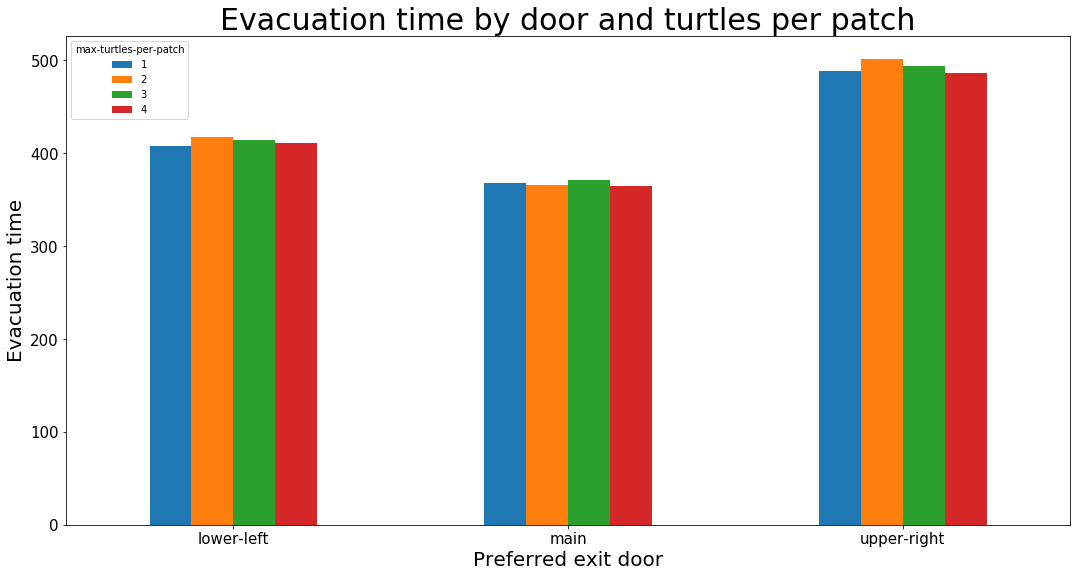

In [7]:
# Plotting the evacuation time per maximum turtles per patch and per preferred exit. 
fig, ax = plt.subplots(figsize = (18,9))
data = evac_times['evacuation-duration']
data.unstack().plot(kind='bar', stacked=False, ax = ax, rot = 0)
ax.set_title('Evacuation time by door and turtles per patch', fontsize = 30)
ax.set_ylabel('Evacuation time', fontsize=20)
ax.set_xlabel('Preferred exit door', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
#plt.xticks(rotation='horizontal')